# Cyclic Permutations of n-gons

[50170.4891604370, -50170.4891604370, 0.000000000000000, 0.000000000000000, -15503.5337666791, -15503.5337666791, 40588.7783468976, 40588.7783468976, -40588.7783468976, -40588.7783468976, 15503.5337666791, 15503.5337666791, -47714.9706417489, -47714.9706417489, -29489.4736288042, -29489.4736288042, 29489.4736288042, 29489.4736288042, 47714.9706417489, 47714.9706417489, -48594.2909863857, -48594.2909863857, -43964.7347923592, -43964.7347923592, -36572.7126203445, -36572.7126203445, -26882.6924093654, -26882.6924093654, -3150.23107942362, -3150.23107942362, 9401.01221229153, 9401.01221229153, 21361.5553322040, 21361.5553322040, 31979.8733682891, 31979.8733682891, 46647.3411068857, 46647.3411068857, 49774.8798682082, 49774.8798682082, -49774.8798682082, -49774.8798682082, -46647.3411068857, -46647.3411068857, -31979.8733682891, -31979.8733682891, -21361.5553322040, -21361.5553322040, -9401.01221229153, -9401.01221229153, 3150.23107942362, 3150.23107942362, 26882.6924093654, 26882.69240936

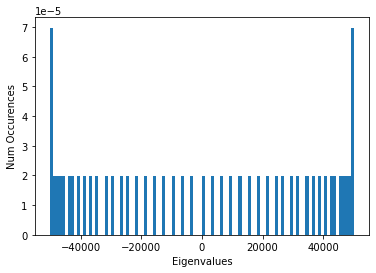

In [7]:
import xlwt
from xlwt import Workbook
#import cmath
import matplotlib.pyplot as plt

export_data = dict()

for i in range(3,101):
    C = groups.permutation.Cyclic(i)
    # Make generating set
    s1 = tuple(range(1,i+1))
    s_ = [1] + list(range(i, 1, -1))
    s2 = tuple(s_)
    S = [s1,s2]
    # Produce Cayley Graph
    d = C.cayley_graph(generators=S)
    d = d.to_undirected()
    
    # Adjacency matrix fxn
    A = d.adjacency_matrix()

    # Get Eigenvalues
    eigenvals = A.eigenvalues()
    export_data[i] = eigenvals
    

# Push data to excel spreadsheet
wb = Workbook()
sheet1 = wb.add_sheet('Cyclic Perms Eigenvalues')
# Column Headers
sheet1.write(int(0), 0, "n")
sheet1.write(int(0),1, "Eigenvalues")
# Perm number
rows = list(export_data.keys())
i = 1
for val in rows:
    sheet1.write(int(i), 0, val)
    i += 1
# Eigenvalues
r = 1
for vals in export_data.values():
    c = 1
    for val in vals:
        sheet1.write(int(r), int(c), str(val))
        c += 1
    r += 1    
wb.save('xlwt cyclic_perms_eigenvals.xls')

# Scale eigenvalues
weighted_export = dict()
i = 3
for m in export_data.values():
    length = len(m) - 1
    lambda_1 = m[0]
    lambda_n = m[-1]
    vals = list()
    for e in m:
        e_weighted = (length/(lambda_1 - lambda_n))*e
        ##TODO: get rid of question mark ###
        # Omit the non-real portion of any complex number
        # .real()
        # RealField() Floating number with arbitrary (still fixed) many bits of precision
        vals.append(RR(e_weighted))
    weighted_export[i] = vals
    i += 1


# Push data to excel spreadsheet
sheet2 = wb.add_sheet('Cyclic Perms Eigenvalues Scaled')
# Column Headers
sheet2.write(int(0), 0, "n")
sheet2.write(int(0),1, "Eigenvalues")
# Perm number
rows = list(weighted_export.keys())
i = 1
for val in rows:
    sheet2.write(int(i), int(0), str(val))
    i += 1
# Eigenvalues
r = 1
for vals in weighted_export.values():
    c = 1
    for val in vals:
        sheet2.write(int(r), int(c), str(val))
        c += 1
    r += 1    
wb.save('xlwt cyclic_perms_eigenvals_weighted.xls')

# Make histogram for n = 100
plt.hist(list(weighted_export[100]), density=True, bins=100)  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Eigenvalues');
plt.show()

# Random Matrices with Zero Diagonal

In [6]:
import numpy as np
import xlwt
from xlwt import Workbook
import matplotlib.pyplot as plt

export_data = dict()

for i in range(6,7):
    # Generate the symmetric random matrix
    M = np.random.rand(i, i)
    # reproduce with zeros and ones here for random graphs
    S = np.matmul(M,M.T)
    # Make the diagonal zero
    for row in range(i):
        for col in range(i):
            if row == col:
                S[row][col] = 0
    print(S)
    # Get eigenvalues
    eigenvals = np.linalg.eigvalsh(S)
    export_data[i] = eigenvals

#print(export_data)
# Push data to excel spreadsheet
wb = Workbook()
sheet1 = wb.add_sheet('Random Matrix Eigenvalues')
# Column Headers
sheet1.write(int(0), 0, "n")
sheet1.write(int(0),1, "Eigenvalues")
# Perm number
rows = list(export_data.keys())
i = 1
for val in rows:
    sheet1.write(int(i), 0, val)
    i += 1
# Eigenvalues
r = 1
for vals in export_data.values():
    c = 1
    for val in vals:
        sheet1.write(int(r), int(c), str(val))
        c += 1
    r += 1    
wb.save('xlwt random_matrix_eigenvals.xls')

# Scale eigenvalues
weighted_export = dict()
i = 3
for m in export_data.values():
    length = len(m) - 1
    lambda_1 = m[0]
    lambda_n = m[-1]
    vals = list()
    for e in m:
        e_weighted = (length/(lambda_1 - lambda_n))*e
        vals.append(e_weighted)
    weighted_export[i] = vals
    i += 1

# Push data to excel spreadsheet
sheet2 = wb.add_sheet('Random Matrix Eigenvals Scaled')
# Column Headers
sheet2.write(int(0), 0, "n")
sheet2.write(int(0),1, "Eigenvalues")
# Perm number
rows = list(weighted_export.keys())
i = 1
for val in rows:
    sheet2.write(int(i), int(0), str(val))
    i += 1
# Eigenvalues
r = 1
for vals in weighted_export.values():
    c = 1
    for val in vals:
        sheet2.write(int(r), int(c), str(val))
        c += 1
    r += 1    
wb.save('xlwt random_matrix_eigenvals_weighted.xls')

# Make histogram for n = 100
plt.hist(list(weighted_export[100]), density=True, bins=100, range=[int(-2),int(2)])  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Eigenvalues');
plt.show()

[[0.         1.65657398 1.05182137 1.73584442 2.454851   0.99179935]
 [1.65657398 0.         1.70616541 1.73636474 2.51085549 0.99357673]
 [1.05182137 1.70616541 0.         1.14070328 1.74045511 0.72642031]
 [1.73584442 1.73636474 1.14070328 0.         2.29343523 1.03859686]
 [2.454851   2.51085549 1.74045511 2.29343523 0.         1.55704762]
 [0.99179935 0.99357673 0.72642031 1.03859686 1.55704762 0.        ]]


KeyError: 6

## TODO: Change manner of creating matrix so that the matrix is chosen with a normal distribution from [0,1] with mean 0 and standard deviation of 1

# 200 Real 50x50 Symmetric Matrices
## Normal Distribution

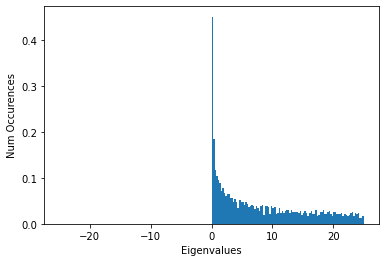

In [2]:
import numpy as np
import xlwt
from xlwt import Workbook
import matplotlib.pyplot as plt

all_eigenvals = []
# Produce 200 50x50 random real symmetric matrices
for i in range(200):
    # Generate the symmetric random matrix
    M = np.random.rand(50, 50)
    S = np.matmul(M,M.T)
    
    # Get eigenvalues
    eigenvals = np.linalg.eigvalsh(S)
    for e in eigenvals:
        all_eigenvals.append(e)
    
# Scale eigenvalues
all_eigenvals_weighted = list()
length = len(all_eigenvals) - 1
lambda_1 = min(all_eigenvals)
lambda_n = max(all_eigenvals)
for val in all_eigenvals:
    e_weighted = (length/(lambda_n - lambda_1))*val
    all_eigenvals_weighted.append(e_weighted)
    
# Make histogram
plt.hist(all_eigenvals_weighted, density=True, bins=200, range=[int(-25),int(25)])  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Eigenvalues');
plt.show()
    

[[ 1.17310455 -1.32824837 -1.48831375  0.81723952  0.29820726]
 [-1.32824837 -2.43597483  0.73633338  1.02184096  0.59860831]
 [-1.48831375  0.73633338 -1.15371012 -0.23099457 -0.69772946]
 [ 0.81723952  1.02184096 -0.23099457 -0.88551071  0.22148652]
 [ 0.29820726  0.59860831 -0.69772946  0.22148652 -0.93880734]]
[0.0, 0.24642574929582892, 0.4488981773476261, 0.574327197725492, 1.0]


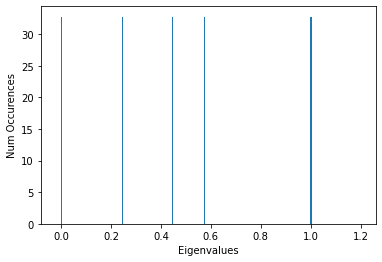

In [56]:
import numpy as np
import xlwt
from xlwt import Workbook
import matplotlib.pyplot as plt

s = np.random.normal(0, 1, size=(5,5))

rows = s.shape[0]
cols = s.shape[1]
for i in range(0, rows):
    for j in range(i+1, cols):
        s[j,i] = s[i,j]
print(s)

# Get eigenvalues
eigenvals = np.linalg.eigvalsh(s)

    
# Scale eigenvalues
all_eigenvals_weighted = list()
length = len(eigenvals) - 1
lambda_1 = min(eigenvals)
lambda_n = max(eigenvals)
for val in eigenvals:
    e_weighted = (val-lambda_1)/(lambda_n-lambda_1)
    all_eigenvals_weighted.append(e_weighted)
print(all_eigenvals_weighted)    

 # Make histogram
plt.hist(all_eigenvals_weighted, density=True, bins=200, range=[float(-0.02),float(1.2)])  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Eigenvalues');
plt.show()



# 200 Real 50x50 Symmetric Matrices
## Uniform Distribution

[[0.66908758 0.09594791 0.14130954 0.51239059 0.56726407]
 [0.09594791 0.95270808 0.3561657  0.31398172 0.56296985]
 [0.14130954 0.3561657  0.61445175 0.4380848  0.54954044]
 [0.51239059 0.31398172 0.4380848  0.42919136 0.90395534]
 [0.56726407 0.56296985 0.54954044 0.90395534 0.81569427]]
[0.0, 0.12365741940626078, 0.24071346802745408, 0.3838501311643675, 1.0]


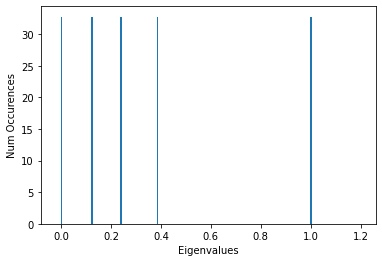

In [3]:
import numpy as np
import xlwt
from xlwt import Workbook
import matplotlib.pyplot as plt

s = np.random.uniform(0, 1, size=(5,5))

rows = s.shape[0]
cols = s.shape[1]
for i in range(0, rows):
    for j in range(i+1, cols):
        s[j,i] = s[i,j]
print(s)

# Get eigenvalues
eigenvals = np.linalg.eigvalsh(s)

    
# Scale eigenvalues
all_eigenvals_weighted = list()
length = len(eigenvals) - 1
lambda_1 = min(eigenvals)
lambda_n = max(eigenvals)
for val in eigenvals:
    e_weighted = (val-lambda_1)/(lambda_n-lambda_1)
    all_eigenvals_weighted.append(e_weighted)
print(all_eigenvals_weighted)    

 # Make histogram
plt.hist(all_eigenvals_weighted, density=True, bins=200, range=[float(-0.02),float(1.2)])  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Eigenvalues');
plt.show()

# Uniform Distribution

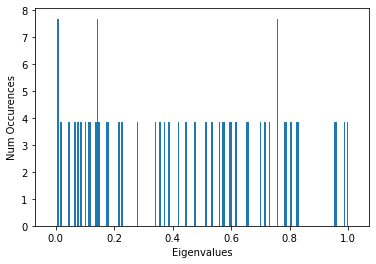

In [8]:
import numpy as np
import xlwt
import random
from xlwt import Workbook
import matplotlib.pyplot as plt

nums = []
# Generate uniform numbers
for i in range(50):
    num = random.uniform(0, 1)
    nums.append(num)
    
# Make histogram
plt.hist(nums, density=True, bins=200, range=[float(-.02),float(1.02)])  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Eigenvalues');
plt.show()

# Poisson Spectrum

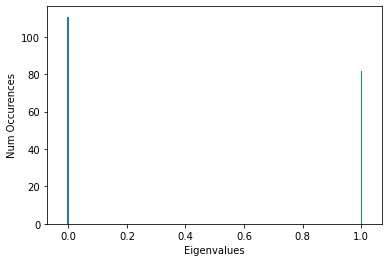

In [16]:
import numpy as np
import xlwt
import random
from xlwt import Workbook
import matplotlib.pyplot as plt

nums = []
# Generate uniform numbers
for i in range(50):
    # params: lambda, size
    num = np.random.poisson(1.0)
    nums.append(num)

# Make histogram
plt.hist(nums, density=True, bins=200, range=[float(-.02),float(1.02)])  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Eigenvalues');
plt.show()

# Cyclic Permutations n-gons with Opposite Edges

# Notes from Finite Models for Arithmetical Chaos

Focusing on using random symmetric matrices and other symmetric matrices, we will be studying the spectra of the eigenvalues.

These are all operators on Hilbert Spaces **(what are Hilbert Spaces)?**
Quantum physics (eigenvalues of Schrodinger operator), Geometry/number theory (L Laplace operator on Riemannian manifold M), and the graph theory branch

Graph theory focus: statistic of spectrum of the adjacency operator of a Cayley graph of a finite group - "finite quantum chaos" (right branch on the tree)
The zeros of the various zeta functions (roots of the tree) sometimes correspond with eigenvalues of the operators at the top of the tree (what we are studying - with focus on right branch)

**Classify these into branches**
Different columns to create: Poisson, Primer, half life, Sinai, Zeros, Uniform, Mod group 2, finite upper half plane

Trace formulas?

## Quantum Mechanics

***Definition:*** The energy levels E of a physical system are the eigenvalues of a Schrodinger equation H*phi* = E*phi*, where H is the Hamiltonian (a differential operator), and phi is the state function (eigenfunction of H), and E is the energy level (eigenvalue of H).

BUT, it is usually hard to use this to know all the energy levels. Thus, we turn to statistical theory. Symmetry group (groups of motions commuting with H) have a big effect on the energy levels. **Need more info on this**

Wigner model: model H with large real symmetric nxn matrices whose entries are independent Gaussian random variables
-> random matrices
-> eigenvalues look like a semi-circle **Replicate this**
-> 200 real, symmetric 50x50 matrices with entries chosen according to normal distribution
Shows no similarity to observed distribution in spectra 
Common in number/graph theory

This is why physicists have devoted more attention to histograms of level spacings rather than levels. -> eigenvals in decreasing order, normalized to 1. Then, get histogram. Histogram looks like Poisson and GOE
**Poisson**: Wigner surmise -> Gaudin-Mehta distribution function (complicated but can be calculated online). 
**Key takeaway:** For integrable systems, the eigenvalues follow Poisson behavior, eigenvalues of chaotic systems follow GOE distribution
**Idea:** Create histograms of eigenvalues and compare them to the Poisson and GOE distributions
**GOE (Gaussian Orthogonal Ensemble):** The eigenvalues of a random nxn symmetric real matrix as n goes to infinity
-> many experimental studies comparing GOE prediction and nuclear data
-> requirement for inclusion in the nuclear data ensemble is that the individual sequences must be in general agreement with GOE

## Arithmetic Quantum Chaos

Involves objects of interest which may or may not be known to be related to eigenvalues of operators, objects include zeros of zeta functions and eigenvalues of Laplacians on quotients of arithmetic groups

**Riemann zeta function need more understanding**
Non-real zeros are on the line of 1/2
The statistics of Reimann zeta zeros and the statistics of the energy levels of quantum systems are related -> this statement is somehow connected to the statement that for a large n, the level spacings look like that of a Gaussian unitary ensemble (GUE)
-> then the paper gives an approximation fxn for programming purposes
the eigenfunctions are spheroidal waves
**Overall I'm just very confused with section 3.1**

**Eigenvalues on the Laplacian on Riemannian Manifolds**
**Section 3.2 also confuses me**
**I need help on this section** 

## Graph Theory

The spectrum of a partial differential operator (like Schrodinger, Laplace, or Riemann) is a topic in linear algebra on infinite dimension vector spaces
Taking the infinite space and replace with a finite dimensional version (**what we are working on right now)**
Replacing the differential operator with a finite analogue - the adjacency matrix/operator of a graph
Reasonable model for a molecule
Seeks to study things such has the stability of a molecule by computing a constant from the eigenvalues of A
Ramanujan graphs connected k-regular graphs with smallest possible asymptotic bound on eigenvalues
-> Ihara zeta fxn satisfies analogue of Riemann hypothesis

-> Euclidean & finite upper half plane graphs

Generic k-regular graphs level spacing dist. looks like GOE as the number of vertices goes to infinity

**Want to look at how these level spacings behave as vertices approaches infinity**

GL(2, F)

If Cayley graph G is the cyclic group Z/nZ, complete orthogonal set of eigenfunctions of A are the characters of G

**Replicate** Cumulative distribution for the level spacings of ten 4-regular graphs on 2,000 vertices generated by running a Markov chain for 10^8 steps looks remarkably similar to the cumulative dist. fxn for the Wigner surmise
Cumulative dist. fxn for eigenvalue spacings of Cayley graph X(SL(2, Z/157Z), {t, t^-1, w, w^-1}) excluding first and second largest eigenvalues looks extremely close to Poisson cumulative dist.

Histograms of various Cayley graphs
Euclidean plane graph
Kloosterman sums **what** implies that the finite Euclidean graphs are Ramanujan when p=3(mod4)
Finite Euclidean graphs can be Ramanujan or not

We can replace infinite Euclidean plane with finite non-Euclidean "upper" half plane

**Larger groups and butterflies**
Heisenburg group

# Three Symmetric Spaces (Part 2)

Ihara Zeta function, the reciprocal of a polynomial, no zeros
Only consider poles of Riemann hypothesis

Comparing Selberg trace formula in 3 spaces



# Notes

Zeta fxns roots match up with eigenvalues 
Z fxns encode eigenvals, helps us see symmetries of eigenvals
Conversely, operator's eigenvals help see zeta fxn's properties 
Mostly a motivation!!!

finding spectra of operators important for:
q mechs